<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/archive/Training'

In [4]:
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [5]:
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
np.unique(Y)

array([0, 1, 2, 3])

**1. DATA EXPLORATION AND VISUALIZATION**

In [ ]:
a = pd.Series(Y).value_counts()

In [ ]:
pd.Series(Y).value_counts().sum()

2870

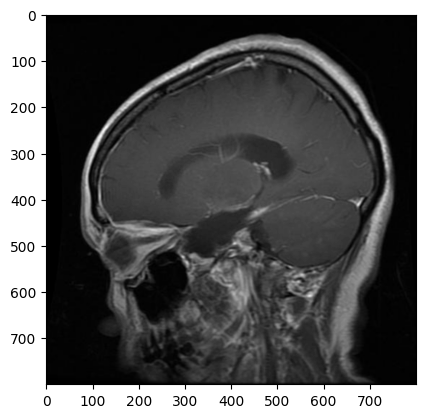

In [ ]:
plt.imshow(X[0], cmap='gray')

[Text(0, 0, 'Pituitary Tumor'),
 Text(1, 0, 'Glioma Tumor'),
 Text(2, 0, 'No Tumor'),
 Text(3, 0, 'Meningioma Tumor')]

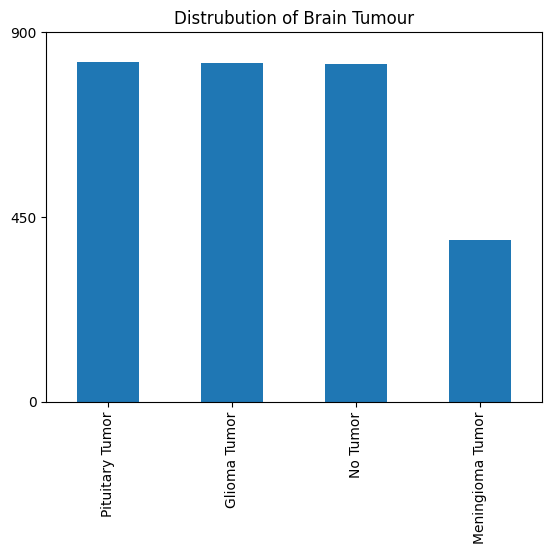

In [ ]:
fig, ax = plt.subplots()
p1 = a.plot(kind='bar', title='Distrubution of Brain Tumour', yticks=[0,450,900])
ax.set_xticklabels(['Pituitary Tumor','Glioma Tumor','No Tumor','Meningioma Tumor'])

In [ ]:
import random
mylist = []
for i in range(0,2870):
  a = random.randint(10,100)
  mylist.append(a)

In [ ]:
data = pd.DataFrame(data = zip(Y,mylist),columns=['Tumour Type','Age'])

In [ ]:
data['Tumour Type'] = data['Tumour Type'].astype('category')

In [ ]:
data['Tumour Type'] = data['Tumour Type'].cat.rename_categories({0:'Glioma Tumor',1 : 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'})

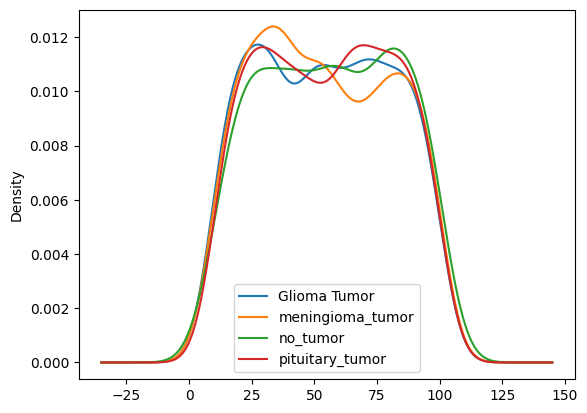

In [ ]:
data.groupby('Tumour Type').Age.plot(kind='kde')
plt.legend()
plt.show()

DATA PREPROCESSING

In [6]:
X = np.array(X)
X_updated = X.reshape(len(X), -1)

In [8]:
Y = np.array(Y)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,shear_range=0.2,brightness_range= (0.5,1.5),featurewise_std_normalization=True)
datagen.fit(xtrain.reshape(2296, 200, 200, 1))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


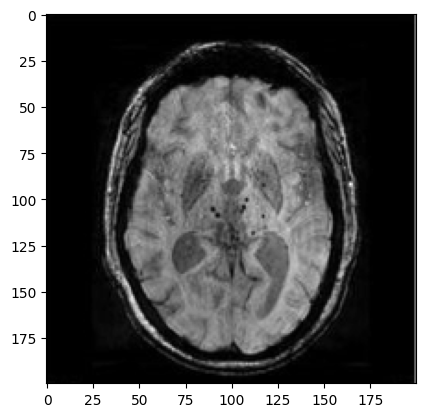

In [ ]:
plt.imshow(xtrain.reshape(2296, 200, 200)[0], cmap=plt.get_cmap('gray'))
plt.show()

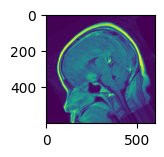

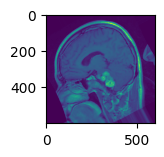

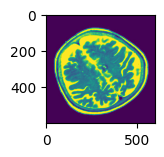

In [ ]:
for X_batch, y_batch in datagen.flow(xtrain.reshape(2296, 200, 200,1), ytrain, batch_size=3):
    for i in range(0, 3):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(200, 200, 1))
        plt.show()
    break

MODEL BUILDING AND TRAINING

In [10]:
xtrain = xtrain/255
xtest = xtest/255

In [11]:
from sklearn.svm import SVC
sv = SVC(probability=True)
sv.fit(xtrain, ytrain)

SVC(probability=True)

In [16]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9398954703832753
Testing Score: 0.7961672473867596


In [17]:
ypred = sv.predict(xtest)

MODEL EVALUATION

In [ ]:
print("The accuracy is ",accuracy_score(ypred,ytest))
#Precision and recall cannot be computed as its supported for binary class
#print("The precision score is ",precision_score(ypred,ytest))
#print("The recall score is ",recall_score(ypred,ytest))
#print("The F1 Score is",f1_score(ypred,ytest))

The accuracy is  0.7961672473867596


In [23]:
prob = sv.predict_proba(xtest)

In [26]:
roc_auc_scores = []
n =4
for i in range(n):
  roc_auc = roc_auc_score(ytest == i,prob[:,i])
  roc_auc_scores.append(roc_auc)

In [27]:
roc_auc_scores

[0.9549516908212561,
 0.9165607422017679,
 0.9699813459606831,
 0.9882651895842851]

In [ ]:
misclassified=np.where(ytest!=ypred)
len(misclassified[0])

117

HYPERPARAMETER TUNING

In [12]:
svc = SVC(C=0.1,gamma=1,kernel='poly')

In [13]:
svc.fit(xtrain,ytrain)

SVC(C=0.1, gamma=1, kernel='poly')

In [17]:
pred = svc.predict(xtest)

In [18]:
print("The accuracy is ",accuracy_score(pred,ytest))

The accuracy is  0.8449477351916377


PREDICTION

In [ ]:
dec=  {0:'Glioma Tumor',1 : 'meningioma_tumor', 2: 'No Tumor', 3: 'pituitary_tumor'}

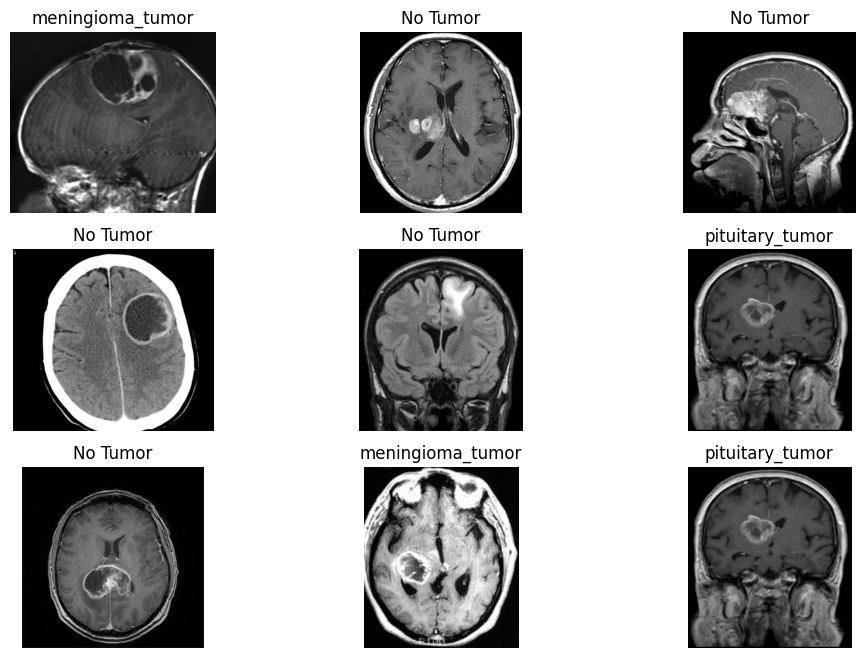

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive/Testing/glioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()

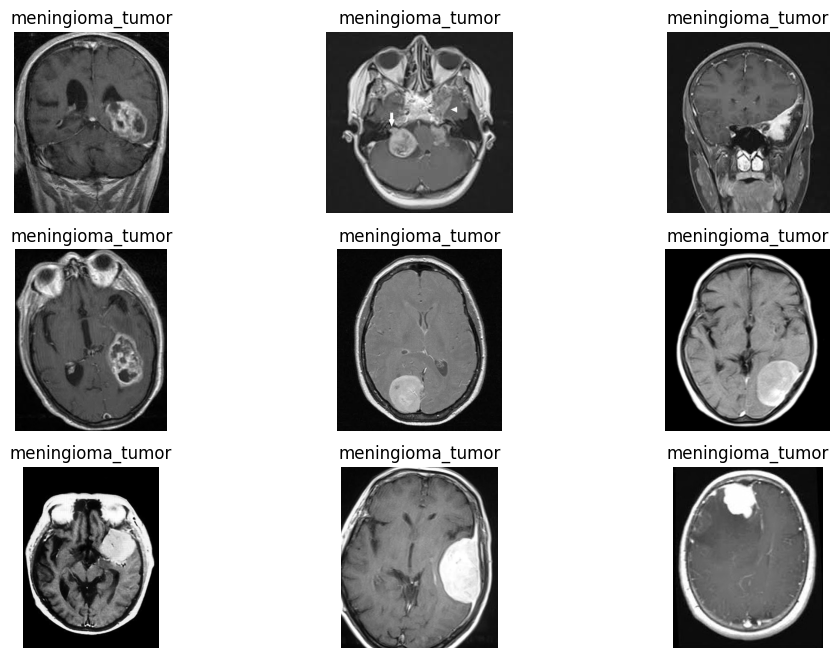

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive/Testing/meningioma_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

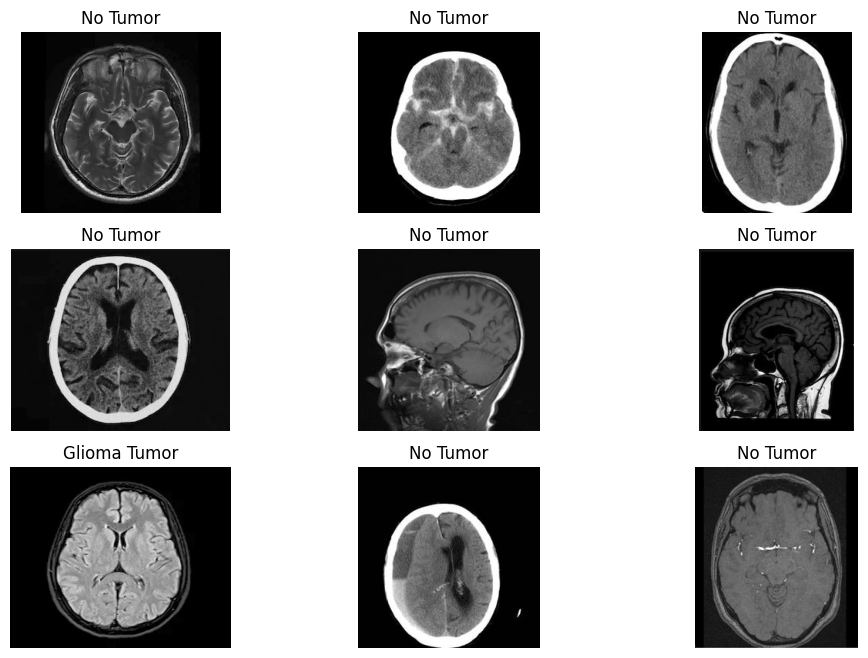

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

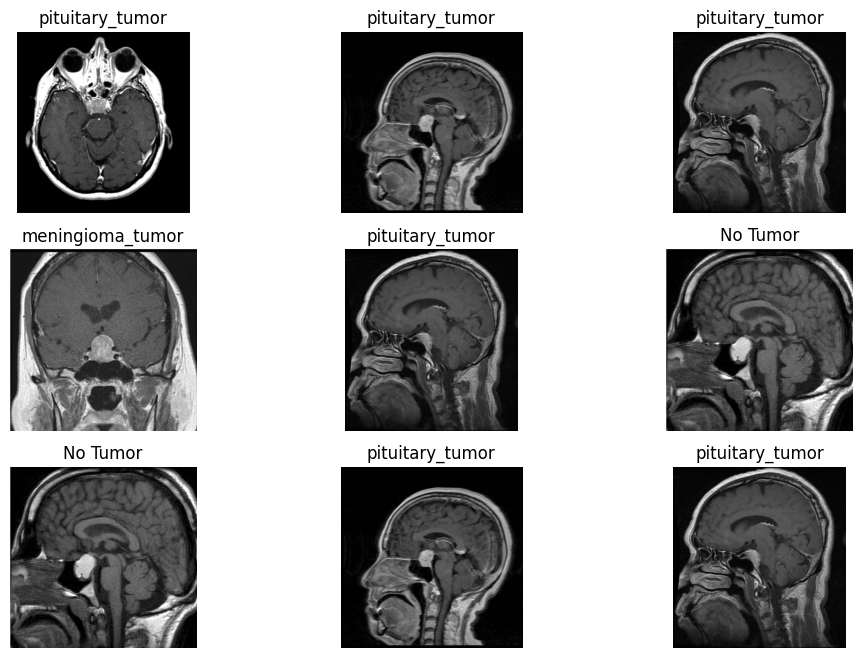

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive/Testing/pituitary_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()